In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv("Students_Performance_mv.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               989 non-null    object
 2   parental level of education  979 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      996 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isna().sum()

gender                          0
race/ethnicity                 11
parental level of education    21
lunch                          12
test preparation course         4
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [5]:
missing = df.isna().mean()*100
missing[missing>0]

race/ethnicity                 1.1
parental level of education    2.1
lunch                          1.2
test preparation course        0.4
dtype: float64

Delete rows that contain missing value

In [6]:
df.dropna(inplace=True)
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Fill missing value by Mode

In [8]:
df = pd.read_csv("Students_Performance_mv.csv")
for col in df.columns:
    mean_value = df[col].mode()[0]
    df.fillna({col:mean_value},inplace=True)
missing = df.isna().mean()*100
missing[missing>0]

Series([], dtype: float64)

Outliners

<Axes: >

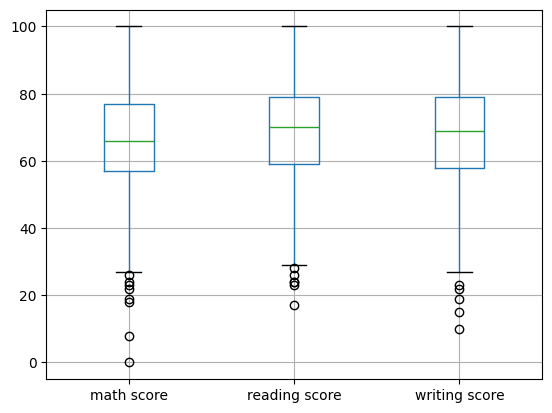

In [9]:
df.boxplot()


Detect and visualize outliners

In [5]:
# Detect outliners using IQR:
writing = np.array(df['writing score'])
Q1 = np.percentile(writing,25)
Q3 = np.percentile(writing, 75)
IQR = Q3 - Q1
writing_outliners = writing[((writing < (Q1 - 1.5 * IQR)) | (writing > (Q3 + 1.5 * IQR)))]
print(writing_outliners)

[10 22 19 15 23]


{'whiskers': [<matplotlib.lines.Line2D at 0x1f1c83e50f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1c83e5630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1c83e4e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1c83e5b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1c83e5e10>],
 'means': []}

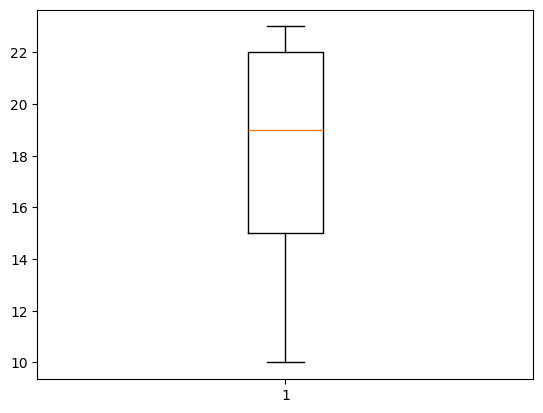

In [6]:
# visualize using boxplot
plt.boxplot(writing_outliners)

In [7]:
# Detect outliners using z-score:
math = np.array(df['math score'])
z_score = np.abs(stats.zscore(math))
math_outliners = math[(z_score > 3)]
print(math_outliners)

[18  0 19  8]


{'whiskers': [<matplotlib.lines.Line2D at 0x1f1c84c2710>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1c84c2c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1c84c2470>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1c84c3190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1c84c3400>],
 'means': []}

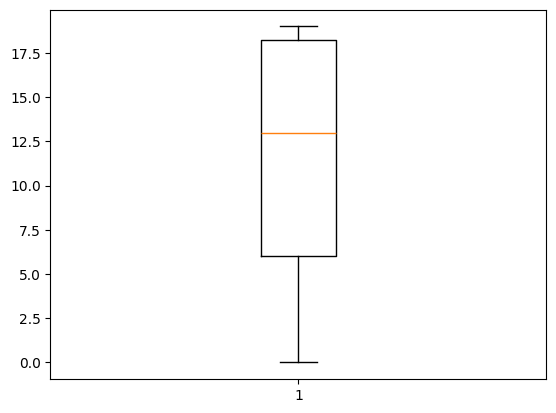

In [8]:
plt.boxplot(math_outliners)

Handle outliners

In [134]:
# handle outliners using Isolation Forest
clf = IsolationForest(contamination=0.2)
pred = clf.fit_predict(math.reshape(-1,1))
data_no_outliners = math[pred == 1]
print(data_no_outliners)

[72 69 47 76 71 64 58 65 78 50 69 46 54 66 69 74 73 69 67 70 62 69 63 56
 81 74 50 75 57 55 58 53 59 65 55 66 57 82 53 77 53 71 82 52 79 62 69 59
 67 45 60 61 58 63 61 49 61 62 47 49 50 72 73 76 71 58 73 65 71 78 65 58
 65 79 68 60 58 87 66 70 77 62 54 51 75 78 51 55 79 63 87 72 65 82 51 53
 87 75 74 51 70 59 71 76 59 57 73 68 62 77 59 54 62 70 66 60 61 66 82 75
 49 52 81 53 58 68 67 79 63 81 46 71 52 62 46 50 65 45 65 80 62 48 77 66
 76 62 77 69 61 59 55 45 67 65 69 57 59 74 82 81 74 58 80 60 87 66 61 56
 87 55 52 45 72 57 68 76 46 67 80 63 64 54 73 80 56 59 75 58 65 47 71 60
 80 54 62 64 78 70 65 64 79 76 59 63 69 71 69 58 47 65 59 65 73 53 45 73
 70 81 67 77 76 63 65 78 67 46 71 81 56 67 80 74 69 51 53 49 73 66 67 68
 59 71 77 63 56 67 75 71 82 61 82 71 47 62 61 76 49 58 61 69 67 79 72 62
 77 75 87 52 66 63 46 59 61 63 59 80 58 52 59 49 69 61 73 45 74 82 59 46
 80 71 66 80 87 79 67 64 57 62 73 77 76 57 65 48 50 74 60 59 53 49 54 63
 65 82 52 87 70 71 71 74 68 57 82 57 47 59 62 69 65

In [131]:
# Handle outliners using winsorization
winsorize_data = winsorize(writing, limits=[0.05,0.05])
print(winsorize_data)

[74 88 93 44 75 78 92 43 67 50 52 43 73 70 58 78 86 43 46 61 63 53 73 80
 72 55 75 65 75 74 61 65 43 82 79 83 59 88 57 54 68 65 66 57 62 76 76 82
 48 68 43 75 87 43 86 49 43 72 43 55 71 59 61 43 74 56 57 73 63 48 56 43
 43 43 72 68 50 45 54 63 43 82 88 74 67 82 74 43 71 50 82 62 62 62 67 74
 89 47 90 72 93 64 72 93 49 47 54 93 74 82 79 61 65 89 92 93 56 73 86 67
 74 74 51 82 43 70 84 75 43 56 67 69 71 64 54 47 78 43 75 66 81 93 69 68
 66 47 61 88 78 60 87 64 74 85 52 49 91 93 51 78 78 70 78 81 70 54 87 58
 77 62 93 75 66 47 70 49 65 65 68 45 87 69 79 66 62 85 52 65 51 55 86 77
 69 68 43 78 62 76 76 66 79 43 60 56 81 75 88 43 70 56 74 73 62 75 73 54
 71 54 64 93 66 43 83 78 84 77 67 74 51 80 66 83 55 43 69 71 74 68 62 49
 83 70 72 52 70 68 77 78 81 77 78 51 90 68 43 81 77 93 70 61 43 58 71 76
 73 93 75 80 57 43 46 84 78 46 82 82 76 77 68 70 57 75 80 60 43 68 50 75
 81 52 81 64 83 69 81 44 67 52 80 57 68 69 75 65 91 78 69 63 84 79 80 43
 93 62 43 77 51 61 43 53 81 93 66 69 43 43 60 52 63

Read new data

In [13]:
df1 = pd.read_csv('Wine_Quality.csv')
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [15]:
df1.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [17]:
missing = df1.isna().mean()*100
missing[missing>0]

fixed acidity       0.153917
volatile acidity    0.123134
citric acid         0.046175
residual sugar      0.030783
chlorides           0.030783
pH                  0.138525
sulphates           0.061567
dtype: float64

Fill missing value by mean

In [18]:
for col in df1.columns:
    if df1[col].dtypes != 'object':
        mean_value = df1[col].mean()
        df1.fillna({col:mean_value},inplace=True)
missing = df1.isna().mean()*100
missing[missing>0]

Series([], dtype: float64)

Fill missing value by median

In [1]:
df1 = pd.read_csv('Wine_Quality.csv')
missing = df1.isna().mean()*100
missing[missing>0]

NameError: name 'pd' is not defined

In [23]:
for col in df1.columns:
    if df1[col].dtypes != 'object':
        mean_value = df1[col].median()
        df1.fillna({col:mean_value},inplace=True)
missing = df1.isna().mean()*100
missing[missing>0]

fixed acidity       0.153917
volatile acidity    0.123134
citric acid         0.046175
residual sugar      0.030783
chlorides           0.030783
pH                  0.138525
sulphates           0.061567
dtype: float64

In [26]:
df1['fixed acidity'].hist()

<Axes: >

Log transformation

In [27]:
lot = np.array(df1['fixed acidity'])
lot

array([7. , 6.3, 8.1, ..., 6.3, 5.9, 6. ])

In [28]:
log_lot = np.log(lot)
log_lot

array([1.94591015, 1.84054963, 2.09186406, ..., 1.84054963, 1.77495235,
       1.79175947])

In [29]:
plt.hist(log_lot, edgecolor="black")

(array([   4.,   59.,  456., 2028., 2421.,  963.,  339.,  150.,   56.,
          11.]),
 array([1.33500107, 1.47813287, 1.62126468, 1.76439648, 1.90752828,
        2.05066009, 2.19379189, 2.3369237 , 2.4800555 , 2.6231873 ,
        2.76631911]),
 <BarContainer object of 10 artists>)